In [47]:
import pandas as pd
import seaborn as sns
import os

workdir = os.path.abspath(r"F:\full predictions\dspi4")

alldata = pd.DataFrame()

for f in os.listdir(workdir):
    if ".csv" in f:
        fname = f.split("_")
        strain = fname[0]
        condition = fname[1]
        
        df = pd.read_csv(os.path.join(workdir,f), encoding='ansi')
        df.drop([0,1,2], axis=0, inplace=True) #column headers are in triplets
         
        #df = df.filter(items=['ID', 'TRACK_ID', 'FRAME'])

        df2 = df.groupby(['FRAME'])[['TRACK_ID', 'ID']].count() 
        df2['strain'] = strain
        df2['condition'] = condition
        df2['file'] = f
        df2.reset_index(inplace=True)
        df2['fraction_motile'] = df2['TRACK_ID']/df2['ID']
        df2['fraction_bound'] = 1 - df2['fraction_motile']
        alldata = pd.concat([alldata, df2]).reset_index(drop=True)
        
alldata.head()


C:\Users\Jens\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FRAME,TRACK_ID,ID,strain,condition,file,fraction_motile,fraction_bound
0,199,28,39,wt,OGM,wt_OGM_1spots.csv,0.717949,0.282051
1,200,63,92,wt,OGM,wt_OGM_1spots.csv,0.684783,0.315217
2,201,60,92,wt,OGM,wt_OGM_1spots.csv,0.652174,0.347826
3,202,64,101,wt,OGM,wt_OGM_1spots.csv,0.633663,0.366337
4,203,62,97,wt,OGM,wt_OGM_1spots.csv,0.639175,0.360825


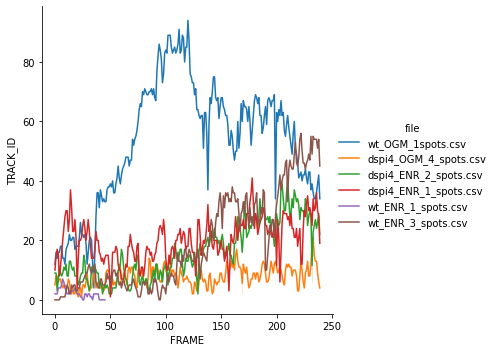

In [57]:
sns.relplot(data=alldata, x='FRAME', y='TRACK_ID', hue='file', kind='line')